In [1]:
from model_api import PoseExtraction
import numpy as np
p=PoseExtraction(r"/home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT")

/home/axel_ubuntu/anaconda3/envs/PCT_linux/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_20e_coco/cascade_rcnn_x101_64x4d_fpn_20e_coco_20200509_224357-051557b1.pth
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16, 16)] ==> [12]
norm8_log_bylayer: [(16,

In [2]:
import os
import requests
from pathlib import Path
#setup the siamese net weight files
def download_and_write_file(url,destination_folder):
    response = requests.get(url, stream=True)

    file_size = int(response.headers.get('Content-Length', 0))
    file_name = url.split("/")[-1]
    destination_path = os.path.join(destination_folder, file_name)

    with open(destination_path, 'wb') as f:
        for data in response.iter_content(1024):
            f.write(data)
if not os.path.exists("./mmtracking_checkpoints"):
            os.makedirs("./mmtracking_checkpoints")
if not os.path.isfile(Path("mmtracking_checkpoints") / Path("selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth")):
    print("downloading selsa_faster_rcnn_r50")
    download_and_write_file("https://download.openmmlab.com/mmtracking/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth","mmtracking_checkpoints")
if not os.path.isfile(Path("mmtracking_checkpoints") / Path("siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth")):
    print("downloading siamese rpn")
    download_and_write_file("https://download.openmmlab.com/mmtracking/sot/siamese_rpn/siamese_rpn_r50_1x_lasot/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth","mmtracking_checkpoints")
if not os.path.isfile(Path("mmtracking_checkpoints") / Path("masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth")):
    print("downloading masktrack rcnn")
    download_and_write_file("https://download.openmmlab.com/mmtracking/vis/masktrack_rcnn/masktrack_rcnn_r50_fpn_12e_youtubevis2019/masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth","mmtracking_checkpoints")

In [3]:
import requests
import tarfile
def setup_base_weights_dir():
    def weights_folder_correct():
        files = ["./weights/pct/swin_base.pth","./weights/heatmap/swin_base.pth","./weights/simmim/swin_base.pth","./weights/tokenizer/swin_base.pth"]
        for file in files:
            if not os.path.isfile(file):
                return False
        return True
    if(not weights_folder_correct()):
        #create folder
        if not os.path.exists("./weights"):
            os.makedirs("./weights")
        #download tar file
        url=r"https://drive.google.com/u/0/uc?id=12pxN3W2UTl7jRSlAu4wHDJkZaPG1oCDB&export=download&confirm=t&uuid=ada72c11-0255-4279-8283-dee8d324b339&at=AKKF8vzTGxHbGT2OYJdDym0HqElj:1688581673447"
        response = requests.get(url, allow_redirects=True)
        open('weights.tar', 'wb').write(response.content)

        #untar it
        tar = tarfile.open("weights.tar")
        tar.extractall()
        tar.close()
        #clean up tar file
        os.remove("weights.tar")
        
setup_base_weights_dir()

<module 'matplotlib.pyplot' from '/home/axel_ubuntu/anaconda3/envs/PCT_linux/lib/python3.8/site-packages/matplotlib/pyplot.py'>

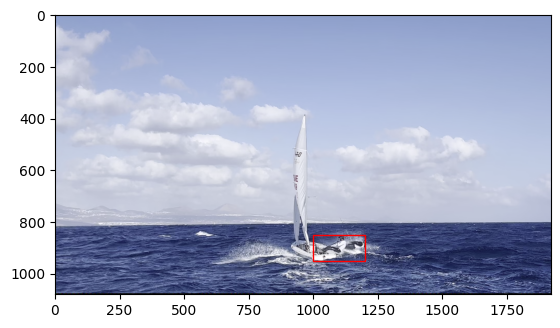

In [4]:
x_start = 1000
x_end = 1200
y_start = 850
y_end = 950
video=r"/home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/videos/470Hiking.mov"
init_bbox=[x_start,y_start,x_end,y_end]
p.vis_bbox_first_frame(init_bbox,video)

In [18]:
import os
from pathlib import Path
import cv2
from PIL import Image
p.setup_frames_data_dir(video)
init_bbox=[x_start,y_start,x_end,y_end]
human_poses=[]
upscaled_frames = []
start_frame = 0
human_bboxes_all=[]
for batch in p.load_image_batch(100):
    #1-5
    sot_bbox_batch=p.calculate_sot_bbox(batch,init_bbox,0)
    cropped_batch=p.crop_video_bbox(batch,sot_bbox_batch)
    upscaled_batch=p.superres_video(cropped_batch)
    human_bboxes_batch=p.yolo_segmentation(upscaled_batch)
    human_bboxes_all.append(human_bboxes_batch)
    human_poses_batch=p.pct_pose_estimation(upscaled_batch,human_bboxes_batch)
    
    #append and set init_bbox for next iteration, and increment starting frame for next batch
    for item in human_poses_batch:
        human_poses.append(item)
    if not os.path.exists(str((Path("temp") / Path("upscaled")))):
            os.makedirs(str((Path("temp") / Path("upscaled"))))
    for i,frame in enumerate(cropped_batch):
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB
        pil_image = Image.fromarray(frame_rgb)
        pil_image.save(str(Path("temp") / Path("upscaled") / Path(f"img_{start_frame+i:06}.jpg")))
    init_bbox=sot_bbox_batch[-1]["bbox"][:4] #[]"bbox"] because its a map, [:4] to ditch the probability
    start_frame+=len(batch)
#p.delete_frames_data_dir()

/home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/videos/470Hiking.mov
writing each frame of video to /home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/temp


100%|████████████████████████████████████████████████████████| 362/362
2023-07-06 16:45:17,623 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-06 16:45:17,624 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-06 16:45:17,624 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: /home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/mmtracking_checkpoints/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 12.8 task/s, elapsed: 8s, ETA:     0swidth,height:(231, 105)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1736.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 2 persons, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 2 persons, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 2 persons, 11: 384x640 1 person, 12: 384x640 1 person, 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 2 persons, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 (no detections), 34: 384x640 (no detections), 35: 

[                                 ] 1/100, 7.0 task/s, elapsed: 0s, ETA:    14s

/home/axel_ubuntu/anaconda3/envs/PCT_linux/lib/python3.8/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


[>>>>>>>>>>>>                    ] 38/100, 7.3 task/s, elapsed: 5s, ETA:     8s

2023-07-06 16:45:36,646 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-06 16:45:36,647 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-06 16:45:36,647 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: /home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/mmtracking_checkpoints/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 12.5 task/s, elapsed: 8s, ETA:     0swidth,height:(268, 91)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1682.9 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 2 persons, 2: 384x640 1 person, 3: 384x640 2 persons, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 (no detections), 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 (no detections), 18: 384x640 2 persons, 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36: 384x640 1 pers

[>>>>>>>>>>>>>>>>                ] 52/100, 7.2 task/s, elapsed: 7s, ETA:     7s

2023-07-06 16:45:57,137 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-06 16:45:57,138 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-06 16:45:57,139 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: /home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/mmtracking_checkpoints/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 12.4 task/s, elapsed: 8s, ETA:     0swidth,height:(274, 103)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1778.3 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 1 person, 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 1 person, 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 (no detections), 33:

[>>>>>>>                         ] 22/100, 7.7 task/s, elapsed: 3s, ETA:    10s

2023-07-06 16:46:12,616 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-06 16:46:12,617 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-06 16:46:12,618 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: /home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/mmtracking_checkpoints/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 62/62, 12.2 task/s, elapsed: 5s, ETA:     0swidth,height:(280, 101)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 62/62, 1676.5 task/s, elapsed: 0s, ETA:     0sNOTE: NO SUPERRESOLUTION IS BEING APPLIED USES BICUBIC INTERPOLATION



WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 1 person, 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 (no detections), 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 1 person, 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 1 person, 28: 384x640 1 person, 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x64

[>>>>>>>                          ] 15/62, 7.2 task/s, elapsed: 2s, ETA:     7s

In [12]:
import cv2
import numpy as np

def new_vis_pose_result_np(data_numpy, pose_results, thickness):
    # Copy the image so we don't draw on top of the original
    img = data_numpy.copy()
    
    # ChunhuaStyle() equivalent in cv2
    chunhua_style = ChunhuaStyle()
    
    for i, dt in enumerate(pose_results):
        dt_joints = np.array(dt['keypoints']).reshape(17,-1)
        joints_dict = chunhua_style.map_joint_dict(dt_joints)
        
        # draw sticks/lines
        for k, link_pair in enumerate(chunhua_style.link_pairs):
            if k in range(11,16):
                lw = thickness
            else:
                lw = thickness * 2
                
            # map color to BGR for cv2
            color_bgr = (link_pair[2][2], link_pair[2][1], link_pair[2][0])
            
            pt1 = tuple(int(x) for x in joints_dict[link_pair[0]])
            pt2 = tuple(int(x) for x in joints_dict[link_pair[1]])
            cv2.line(img, pt1, pt2, color_bgr, thickness=lw)

        # draw circles
        for k in range(dt_joints.shape[0]):
            if k in range(5):
                radius = thickness
            else:
                radius = thickness * 2
                
            center = tuple(int(x) for x in dt_joints[k,:2])
            
            # map color to BGR for cv2
            ring_color_bgr = (chunhua_style.ring_color[k][2], chunhua_style.ring_color[k][1], chunhua_style.ring_color[k][0])
            
            cv2.circle(img, center, radius, (0,0,0), thickness=-1) # black border
            cv2.circle(img, center, radius-1, ring_color_bgr, thickness=-1) # fill
            
    return img


In [15]:
from model_api import *
import cv2
import os
import glob
#if len(human_poses) < 364:
#    human_poses=[item for sublist in human_poses for item in sublist]
# Get a list of all the image files in the directory
img_files = glob.glob(os.path.join(Path("./temp"), '*.jpg')) #only take jpg files

img_files.sort()  # make sure that the images are in order

# Read the first file to get the size and color information
img = cv2.imread(img_files[0])
height, width, layers = img.shape
size = (width,height)

# Create a VideoWriter object
out = cv2.VideoWriter('output_3.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, size)
prog_bar = mmcv.ProgressBar(len(img_files))
prev_pose = []#no pose until first frame that has a pose
for i,img_file in enumerate(img_files):
    img = cv2.imread(img_file)
    if(human_poses[i] != []):
        processed_img = cv2.resize(new_vis_pose_result_np(img,human_poses[i],1),(1920,1080))
        out.write(processed_img)
        prev_pose=human_poses[i]
    else:
        #use prev frames skeleton
        processed_img = cv2.resize(new_vis_pose_result_np(img,prev_pose,1),(1920,1080))
        out.write(img)
    prog_bar.update()

out.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 113.7 task/s, elapsed: 1s, ETA:     0s

In [22]:
import argparse
import cv2
import glob
import os
import torch
import requests
import numpy as np
from os import path as osp
from collections import OrderedDict
from torch.utils.data import DataLoader

from RVRT.models.network_rvrt import RVRT as net
from RVRT.utils import utils_image as util
from RVRT.data.dataset_video_test import VideoRecurrentTestDataset, VideoTestVimeo90KDataset, SingleVideoRecurrentTestDataset
from RVRT.main_test_rvrt import prepare_model_dataset,test_video,test_clip
###rewritten version of main in RVRT/main_test_rvrt.py
def run_rvrt(task='001_RVRT_videosr_bi_REDS_30frames', sigma=0,
         folder_lq='testsets/REDS4/sharp_bicubic', folder_gt=None,
         tile=[100,128,128], tile_overlap=[2,20,20],
         num_workers=16, save_result=False):

    # define model
    device = torch.device('cuda')
    args = argparse.Namespace(task=task, sigma=sigma, folder_lq=folder_lq, folder_gt=folder_gt,
                              tile=tile, tile_overlap=tile_overlap, num_workers=num_workers,
                              save_result=save_result)
    model = prepare_model_dataset(args)
    model.eval()
    model = model.to(device)

    # define model
    device = torch.device('cuda')
    model = prepare_model_dataset(args)
    model.eval()
    model = model.to(device)
    if 'vimeo' in args.folder_lq.lower():
        test_set = VideoTestVimeo90KDataset({'dataroot_gt':args.folder_gt, 'dataroot_lq':args.folder_lq,
                                           'meta_info_file': "data/meta_info/meta_info_Vimeo90K_test_GT.txt",
                                            'mirror_sequence': True, 'num_frame': 7, 'cache_data': False})
    elif args.folder_gt is not None:
        test_set = VideoRecurrentTestDataset({'dataroot_gt':args.folder_gt, 'dataroot_lq':args.folder_lq,
                                              'sigma':args.sigma, 'num_frame':-1, 'cache_data': False})
    else:
        test_set = SingleVideoRecurrentTestDataset({'dataroot_gt':args.folder_gt, 'dataroot_lq':args.folder_lq,
                                              'sigma':args.sigma, 'num_frame':-1, 'cache_data': False})

    test_loader = DataLoader(dataset=test_set, num_workers=args.num_workers, batch_size=1, shuffle=False)

    save_dir = f'results/{args.task}'
    if args.save_result:
        os.makedirs(save_dir, exist_ok=True)
    test_results = OrderedDict()
    test_results['psnr'] = []
    test_results['ssim'] = []
    test_results['psnr_y'] = []
    test_results['ssim_y'] = []

    assert len(test_loader) != 0, f'No dataset found at {args.folder_lq}'

    for idx, batch in enumerate(test_loader):
        lq = batch['L'].to(device)
        folder = batch['folder']
        gt = batch['H'] if 'H' in batch else None

        # inference
        with torch.no_grad():
            output = test_video(lq, model, args)

        if 'vimeo' in args.folder_lq.lower():
            output = (output[:, 3:4, :, :, :] + output[:, 10:11, :, :, :]) / 2
            batch['lq_path'] = batch['gt_path']

        test_results_folder = OrderedDict()
        test_results_folder['psnr'] = []
        test_results_folder['ssim'] = []
        test_results_folder['psnr_y'] = []
        test_results_folder['ssim_y'] = []

        for i in range(output.shape[1]):
            # save image
            img = output[:, i, ...].data.squeeze().float().cpu().clamp_(0, 1).numpy()
            if img.ndim == 3:
                img = np.transpose(img[[2, 1, 0], :, :], (1, 2, 0))  # CHW-RGB to HCW-BGR
            img = (img * 255.0).round().astype(np.uint8)  # float32 to uint8
            if args.save_result:
                seq_ = osp.basename(batch['lq_path'][i][0]).split('.')[0]
                os.makedirs(f'{save_dir}/{folder[0]}', exist_ok=True)
                cv2.imwrite(f'{save_dir}/{folder[0]}/{seq_}.png', img)

            # evaluate psnr/ssim
            if gt is not None:
                img_gt = gt[:, i, ...].data.squeeze().float().cpu().clamp_(0, 1).numpy()
                if img_gt.ndim == 3:
                    img_gt = np.transpose(img_gt[[2, 1, 0], :, :], (1, 2, 0))  # CHW-RGB to HCW-BGR
                img_gt = (img_gt * 255.0).round().astype(np.uint8)  # float32 to uint8
                img_gt = np.squeeze(img_gt)

                test_results_folder['psnr'].append(util.calculate_psnr(img, img_gt, border=0))
                test_results_folder['ssim'].append(util.calculate_ssim(img, img_gt, border=0))
                if img_gt.ndim == 3:  # RGB image
                    img = util.bgr2ycbcr(img.astype(np.float32) / 255.) * 255.
                    img_gt = util.bgr2ycbcr(img_gt.astype(np.float32) / 255.) * 255.
                    test_results_folder['psnr_y'].append(util.calculate_psnr(img, img_gt, border=0))
                    test_results_folder['ssim_y'].append(util.calculate_ssim(img, img_gt, border=0))
                else:
                    test_results_folder['psnr_y'] = test_results_folder['psnr']
                    test_results_folder['ssim_y'] = test_results_folder['ssim']

        if gt is not None:
            psnr = sum(test_results_folder['psnr']) / len(test_results_folder['psnr'])
            ssim = sum(test_results_folder['ssim']) / len(test_results_folder['ssim'])
            psnr_y = sum(test_results_folder['psnr_y']) / len(test_results_folder['psnr_y'])
            ssim_y = sum(test_results_folder['ssim_y']) / len(test_results_folder['ssim_y'])
            test_results['psnr'].append(psnr)
            test_results['ssim'].append(ssim)
            test_results['psnr_y'].append(psnr_y)
            test_results['ssim_y'].append(ssim_y)
            print('Testing {:20s} ({:2d}/{}) - PSNR: {:.2f} dB; SSIM: {:.4f}; PSNR_Y: {:.2f} dB; SSIM_Y: {:.4f}'.
                      format(folder[0], idx, len(test_loader), psnr, ssim, psnr_y, ssim_y))
        else:
            print('Testing {:20s}  ({:2d}/{})'.format(folder[0], idx, len(test_loader)))

    # summarize psnr/ssim
    if gt is not None:
        ave_psnr = sum(test_results['psnr']) / len(test_results['psnr'])
        ave_ssim = sum(test_results['ssim']) / len(test_results['ssim'])
        ave_psnr_y = sum(test_results['psnr_y']) / len(test_results['psnr_y'])
        ave_ssim_y = sum(test_results['ssim_y']) / len(test_results['ssim_y'])
        print('\n{} \n-- Average PSNR: {:.2f} dB; SSIM: {:.4f}; PSNR_Y: {:.2f} dB; SSIM_Y: {:.4f}'.
              format(save_dir, ave_psnr, ave_ssim, ave_psnr_y, ave_ssim_y))


In [23]:
run_rvrt(folder_lq="/home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/RVRT/testsets/video_frames",
         tile=[30,64,64],
         tile_overlap=[2,20,20],
         num_workers=2,
         save_result=True)


downloading model model_zoo/rvrt/001_RVRT_videosr_bi_REDS_30frames.pth
using dataset from /home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/RVRT/testsets/video_frames
loading model from ./model_zoo/rvrt/model_zoo/rvrt/001_RVRT_videosr_bi_REDS_30frames.pth
using dataset from /home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/RVRT/testsets/video_frames
Testing 470Hiking             ( 0/1)


In [12]:
len(human_poses)

362

In [25]:
cv2.imread(img_files[0]).shape

(1080, 1920, 3)

In [27]:
cv2.resize(vis_pose_result_np(img,human_poses[0],2),(1920,1080)).shape

(1080, 1920, 4)

In [28]:
vis_pose_result_np(img,human_poses[0],2).shape

(1100, 1940, 4)

In [18]:
s=0
for i in human_poses:
    if i!=[]:
        s+=1
s

128

In [8]:
len(img_files)

362

In [8]:
vis_pose_result_np(img,human_poses[0],2).shape,img.shape

((1100, 1940, 4), (1080, 1920, 3))

In [9]:
len(human_poses)

362

In [9]:

c = ChunhuaStyle()

[(252, 176, 243),
 (252, 176, 243),
 (252, 176, 243),
 (0, 176, 240),
 (0, 176, 240),
 (0, 176, 240),
 (255, 255, 0),
 (255, 255, 0),
 (169, 209, 142),
 (169, 209, 142),
 (169, 209, 142),
 (240, 2, 127),
 (240, 2, 127),
 (240, 2, 127),
 (240, 2, 127),
 (240, 2, 127)]

In [10]:
sot_bbox_batch[-1]["bbox"][:4]

array([     942.77,      719.46,      1153.2,      799.49], dtype=float32)

In [8]:
import numpy as np
a=human_bboxes_batch[0]
a

{'bbox': array([[ 285,   67, 1207, 1062]])}

In [14]:
import pickle
with open("bbox_data.pkl","rb") as f:
    a=pickle.load(f)
a[0]

{'bbox': array([       1000,         850,        1200,         950,          -1])}

In [15]:
from mmpose.apis import (inference_top_down_pose_model, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector

In [21]:
mmdet_results = inference_detector(p.det_model, upscaled_batch[:2])
correct_output=process_mmdet_results(mmdet_results, p.cat_id)

In [27]:
human_bboxes_batch

[{'bbox': array([[ 285,   67, 1207, 1062]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 276,   69, 1239, 1051]])},
 {'bbox': array([[ 361,   74, 1231, 1051]])},
 {'bbox': array([[ 284,   62, 1212, 1036]])},
 {'bbox': array([[ 290,   91, 1228, 1037]])},
 {'bbox': array([[ 284,  131, 1233,  996]])},
 {'bbox': array([[ 350,  191, 1268, 1056]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 322,  189, 1239, 1054]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 599,  219, 1227, 1013]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([[ 516,  311, 1145, 1038]])},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 {'bbox': array([], shape=(0, 4), dtype=int32)},
 

In [25]:
correct_output[:3]

[{'bbox': array([[     22.746,      24.117,      1901.5,      1069.2,    0.080107]], dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32)}]

In [12]:
import numpy as np
def pad_bbox_list(bboxes):
                bboxes=[x["bbox"] for x in bboxes]
                padded_lst = []
                for arr in bboxes:
                    if arr.size == 0:
                        # if array is empty, create a new array of shape (2,4) filled with zeros
                        arr = np.zeros((2, 4), dtype=int)
                    else:
                        # if array is not empty, pad it with zeros
                        padding = ((0, 2 - arr.shape[0]), (0, 0))
                        arr = np.pad(arr, pad_width=padding, mode='constant', constant_values=0)
                    padded_lst.append(arr)

                padded_lst = [{"bbox":x} for x in padded_lst]
                return padded_lst
person_results=pad_bbox_list(human_bboxes_batch)
person_results[0]#[box['bbox'] for box in person_results]

{'bbox': array([[ 285,   67, 1207, 1062],
        [   0,    0,    0,    0]])}

In [7]:
import numpy as np
def pad_bbox_list(bboxes):
    bboxes=[x["bbox"] for x in bboxes]
    padded_lst = []
    for arr in bboxes:
        if arr.size == 0:
            # if array is empty, create a new array of shape (2,4) filled with zeros
            arr = np.zeros((2, 4), dtype=int)
        else:
            # if array is not empty, pad it with zeros
            padding = ((0, 2 - arr.shape[0]), (0, 0))
            arr = np.pad(arr, pad_width=padding, mode='constant', constant_values=0)
        padded_lst.append(arr)

    padded_lst = [{"bbox":x} for x in padded_lst]
    return padded_lst

bboxes=pad_bbox_list(human_bboxes_batch)
bboxes = np.array([box['bbox'] for box in bboxes])
bboxes

array([[[ 285,   67, 1207, 1062],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[ 276,   69, 1239, 1051],
        [   0,    0,    0,    0]],

       [[ 361,   74, 1231, 1051],
        [   0,    0,    0,    0]],

       [[ 284,   62, 1212, 1036],
        [   0,    0,    0,    0]],

       [[ 290,   91, 1228, 1037],
        [   0,    0,    0,    0]],

       [[ 284,  131, 1233,  996],
        [   0,    0,    0,    0]],

       [[ 350,  191, 1268, 1056],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[ 322,  189, 1239, 1054],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[   0,    0,    0,    0],
        [   0,    0,    0,    0]],

       [[ 599,  219, 1227, 1013],
        [   0,    0,    0,    0]],

       [[   0,    0,

In [9]:
from mmpose.core.bbox import bbox_xyxy2xywh
bboxes[:, 2]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [2]:
import os
from pathlib import Path
import cv2
from tqdm import tqdm
from PIL import Image
import os

def load_images_in_batches(directory_path, batch_size):
    all_image_files = os.listdir(directory_path)
    
    for i in range(0, len(all_image_files), batch_size):
        batch_files = all_image_files[i:i + batch_size]
        batch_images = []
        
        for file in batch_files:
            image_path = os.path.join(directory_path, file)
            img = Image.open(image_path)
            batch_images.append(img)
        
        yield batch_images

# Usage:
for batch in load_images_in_batches(r"C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\RVRT\testsets\uploaded\output", 100):
    # `batch` now contains up to 100 images loaded from the directory.
    # You can now perform operations on this batch of images.
    print(len(batch))

100
100
100
62


In [4]:
from model_api import VisType
p.video_inference("470Hiking.mov",vis_type=VisType.BBOX,bbox_threshold=0.3)

videos/470Hiking.mov has 30.0 fps


Processing frames:   0%|          | 0/13 [00:00<?, ?frames/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (362,) + inhomogeneous part.

In [23]:
from IPython.display import Video


video = open(r'C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\output\out_15_24.mp4', "rb").read()
Video(url=r"C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\output\out_15_24.mp4")

In [25]:
from IPython.display import Video
Video(r"C:\Users\A\PCT\output\out_17_02.mp4")

AttributeError: type object 'Video' has no attribute 'from_file'

In [13]:
init_bbox = [1020, 840, 1220, 930]
video="C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov"
plt = p.vis_bbox_first_frame(init_bbox,video)
plt.show()

NameError: name 'p' is not defined

In [27]:
bboxes = p.calculate_sot_bbox(init_bbox,video)

2023-07-03 14:45:14,654 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-07-03 14:45:14,655 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-07-03 14:45:14,655 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 10.9 task/s, elapsed: 33s, ETA:     0s
 making the output video at output\sot.mp4 with a FPS of 30.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 34.0 task/s, elapsed: 11s, ETA:     0s


In [11]:
from model_api import calc_max_box_delta_x,calc_max_box_y,crop_video
import numpy as np
#bboxes = p.calculate_sot_bbox(init_bbox,vid_path)
if type(bboxes[0])==dict:
    bboxes = [q["bbox"] for q in bboxes]
width = calc_max_box_delta_x(bboxes)
height = calc_max_box_y(bboxes)
bboxes = np.round(bboxes).astype(np.int32)
crop_video(video,bboxes,"./output",int(width),int(height))

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 137.8 task/s, elapsed: 3s, ETA:     0s

In [10]:
type({})==dict

True

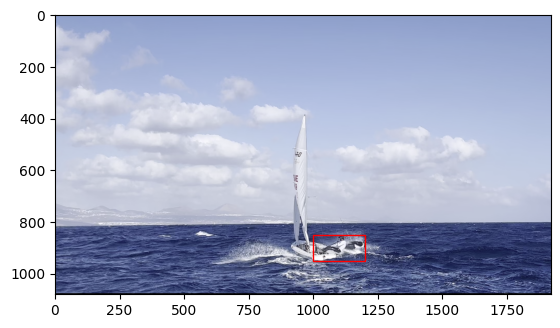

In [2]:
init_bbox = [1000, 850, 1200, 950]
plt = p.vis_bbox_first_frame(init_bbox,"C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")
plt.show()

In [29]:
from model_api import calc_max_box_delta_x,calc_max_box_y,crop_video
import numpy as np
vid_path = "C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov"
#bboxes = p.calculate_sot_bbox(init_bbox,vid_path)
bboxes = [q["bbox"] for q in bboxes]
width = calc_max_box_delta_x(bboxes)
height = calc_max_box_y(bboxes)
bboxes = np.round(bboxes).astype(np.int32)
crop_video(vid_path,bboxes,"./output",int(width),int(height))

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 161.1 task/s, elapsed: 2s, ETA:     0s

In [11]:
type(bboxes[1][1])

numpy.float64

In [9]:
max(box_sizes)

21440.258

In [7]:
bboxes = [q["bbox"] for q in bboxes]

[array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00]),
 array([9.9524561e+02, 8.4814655e+02, 1.1974087e+03, 9.4750861e+02,
        9.9972683e-01], dtype=float32),
 array([9.9391870e+02, 8.4702893e+02, 1.1958254e+03, 9.4855457e+02,
        9.9963844e-01], dtype=float32),
 array([9.9001868e+02, 8.4531262e+02, 1.1932377e+03, 9.4904370e+02,
        9.9951446e-01], dtype=float32),
 array([9.8371838e+02, 8.4602014e+02, 1.1866764e+03, 9.5090149e+02,
        9.9790251e-01], dtype=float32),
 array([9.8051282e+02, 8.4547003e+02, 1.1841063e+03, 9.4977435e+02,
        9.9706703e-01], dtype=float32),
 array([9.7572217e+02, 8.4532733e+02, 1.1798687e+03, 9.5028412e+02,
        9.9431121e-01], dtype=float32),
 array([9.7106396e+02, 8.4416486e+02, 1.1732671e+03, 9.4866681e+02,
        9.9476576e-01], dtype=float32),
 array([9.6859216e+02, 8.4353516e+02, 1.1684230e+03, 9.4818359e+02,
        9.8970395e-01], dtype=float32),
 array([9.6703680e+02, 8.4260938e+02, 1.1669441e+03, 9.4613062e+02,
        

In [5]:
p.apply_bounding_box_mask(init_bbox,"C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")

2023-06-27 17:04:37,713 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-06-27 17:04:37,714 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-06-27 17:04:37,714 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: c:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\mmtracking_checkpoints\siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 11.3 task/s, elapsed: 32s, ETA:     0s
 making the output video at output\sot.mp4 with a FPS of 30.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 33.7 task/s, elapsed: 11s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 58.2 task/s, elapsed: 6s, ETA:     0sWrote visualization video to output\out_17_05.mp4


In [4]:
from model_api import VisType
p.video_inference("C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\output\\out_15_22.mp4",vis_type=VisType.BBOX,bbox_threshold=0.1,framerate=10)

C:\Users\A\Documents\RISE\segling\SailingPoseEstimation\PCT\output\out_15_22.mp4 has 30.0 fps


Processing frames:   0%|          | 0/121 [00:00<?, ?frames/s]c:\Users\A\anaconda3\envs\PCT_new_new\lib\site-packages\torch\utils\checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
Processing frames: 100%|██████████| 121/121 [01:52<00:00,  1.07frames/s]


Wrote visualization video to output/out_17_02.mp4
Total frames processed: 121


In [2]:
res=p.calculate_sot_bbox(init_bbox,"C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")

NameError: name 'init_bbox' is not defined

In [5]:
#create a sligtly zoomed video

p.zoom_video("C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov",
           "C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\2x_zoomed_470Hiking.mp4",2)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 105.1 task/s, elapsed: 3s, ETA:     0sWrote visualization video to output\out_15_24.mp4


In [6]:
import mmcv
q=mmcv.VideoReader("C:\\Users\\A\\Documents\\RISE\\segling\\SailingPoseEstimation\\PCT\\videos\\470Hiking.mov")

In [12]:
import numpy as np
bbox=np.array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00])
#bbox = [int(coord) for coord in bbox]
bbox.astype(np.uint32)
bbox

array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00])

In [7]:
res[0]["bbox"]

array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00])

In [ ]:
#if checkpoints are missing
#!mkdir checkpoints
#!wget -c https://download.openmmlab.com/mmtracking/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth -P ./checkpoints
#!wget -c https://download.openmmlab.com/mmtracking/sot/siamese_rpn/siamese_rpn_r50_1x_lasot/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth -P ./checkpoints
#!wget -c https://download.openmmlab.com/mmtracking/vis/masktrack_rcnn/masktrack_rcnn_r50_fpn_12e_youtubevis2019/masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth -P ./checkpoints